
# The impact of patient's age, patient enrollment in insurance, and patient's location on patient attendance to scheduled appointment in Brazil.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#In this project a data set of 100k medical appointments in brazil was used to study the factors that affect patient attendance to their scheduled appointments. Major factors that have been used in this study are: day of appointment, patient location, medial insurance (Brazilian welfare program).
#This project focused on answering two questions: What is the impact of patient age on their attendance? What is the impact of patient enrollment in medical insurance on their attendance?


In [2]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load data and print info about data.
data = pd.read_csv("noshowappointments.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#Pirnt out a few lines.
data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#change date to data time type
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])

In [6]:
#change date to data time type
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [7]:
#to check if date was changed or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [8]:
#Check for duplicated value
data.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
110497    False
110498    False
110499    False
110500    False
110501    False
110502    False
110503    False
110504    False
110505    False
110506    False
110507    False
110508    False
110509    False
110510    False
110511    False
110512    False
110513    False
110514    False
110515    False
110516    False
110517    False
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: b

From previous step it has been clear that data has no duplicate value

By exploring the CSV file some age value were zero which is not correct. In the next step zero values will be counted and replaced by mean.

In [9]:
print((data['Age'] == 0).sum())

3539


In [10]:
#mean will be defined first for age
mean = data['Age'].mean()
#all zero value should be replaced with the mean
data= data.replace(0, mean)
#to insure that all zero values were replaced with mean
print((data['Age'] == 0).sum())

0


<a id='eda'></a>
## Exploratory Data Analysis


### What is the impact of patient Age on their attendance?
In this section we will study the relation between patient age and thier attendance behavior.

In [11]:
#to have better information about the date
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,38.276435,33.542580,29.970491,34.495355,35.991779,36.359123,25.503421
std,2.560949e+14,7.129575e+04,22.104877,10.742747,14.360534,9.320496,6.195938,5.072945,16.848911
min,3.921784e+04,5.030230e+06,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.172614e+12,5.640286e+06,20.000000,37.088874,37.088874,37.088874,37.088874,37.088874,1.000000
50%,3.173184e+13,5.680573e+06,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874
75%,9.439172e+13,5.725524e+06,55.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874
max,9.999816e+14,5.790484e+06,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874


In [12]:
data['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [13]:
#for the comparsion purpose it's better to have attendance value as 0 and 1
def tran_noshow(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [14]:
#first yes and no would be replaced by 1 and 0
data['No_Show3']= data['No-show'].apply(tran_noshow)
data['No_Show3'] = pd.to_numeric(data['No_Show3'])
#A new varible would be created as defintion of patient attendance
Attend = data['No_Show3'] == 0
NoAttend = data['No_Show3'] == 1
data['Attend'] = Attend
data['NoAttend'] = NoAttend

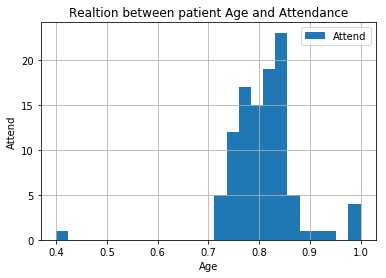

In [20]:
# To study the realtion between patinet age and thier attendance behavior
# To plot a histogram that showing the average of people who attend

data.groupby('Age')['Attend'].mean().hist(alpha=1,bins=25,label='Attend');
plt.xlabel("Age")
plt.ylabel("Attend")
plt.title("Realtion between patient Age and Attendance")
plt.legend();

In [21]:
data_AgeD = data[['Age', 'Attend']].groupby('Age')['Attend'].count()
data_AgeD.head(70)

Age
-1.0        1
 1.0     2273
 2.0     1618
 3.0     1513
 4.0     1299
 5.0     1489
 6.0     1521
 7.0     1427
 8.0     1424
 9.0     1372
 10.0    1274
 11.0    1195
 12.0    1092
 13.0    1103
 14.0    1118
 15.0    1211
 16.0    1402
 17.0    1509
 18.0    1487
 19.0    1545
 20.0    1437
 21.0    1452
 22.0    1376
 23.0    1349
 24.0    1242
 25.0    1332
 26.0    1283
 27.0    1377
 28.0    1448
 29.0    1403
         ... 
 39.0    1536
 40.0    1402
 41.0    1346
 42.0    1272
 43.0    1344
 44.0    1487
 45.0    1453
 46.0    1460
 47.0    1394
 48.0    1399
 49.0    1652
 50.0    1613
 51.0    1567
 52.0    1746
 53.0    1651
 54.0    1530
 55.0    1425
 56.0    1635
 57.0    1603
 58.0    1469
 59.0    1624
 60.0    1411
 61.0    1343
 62.0    1312
 63.0    1374
 64.0    1331
 65.0    1101
 66.0    1187
 67.0     973
 68.0    1012
Name: Attend, Length: 70, dtype: int64

In [22]:
data_AgeD.corr(data['Attend'])

-0.2168906625853833

From previous steps data shows negative correlation between age and attendance. Which means patient age has low impact on their attendance.

### What is the impact of patient insurance enrollment on their attendance?
In this section we will study the relation between patient insurance enrollment and their attendance behavior.

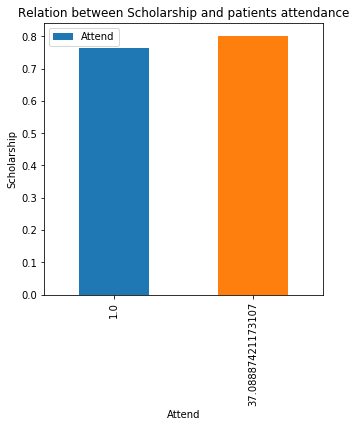

In [23]:
data.groupby('Scholarship')['Attend'].mean().plot(kind='bar',figsize=(5,5));
plt.xlabel("Attend")
plt.ylabel("Scholarship")
plt.title("Relation between Scholarship and patients attendance")
plt.legend();

In [24]:
data['Scholarship'].corr(data['Attend'])

0.029135031314095387

From previous steps, data analysis showd that patinet enrolemtn in welfare dosen't impact on thier attendance behavior. 

### What is the impact of patient's location on their attendance?
In this section we will study the relation between patient's location and their attendance behavior.

In [25]:
data_neighbourhood = data[['Attend', 'Neighbourhood']].groupby('Neighbourhood')['Attend'].count()
data_neighbourhood.head(5)

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
Name: Attend, dtype: int64

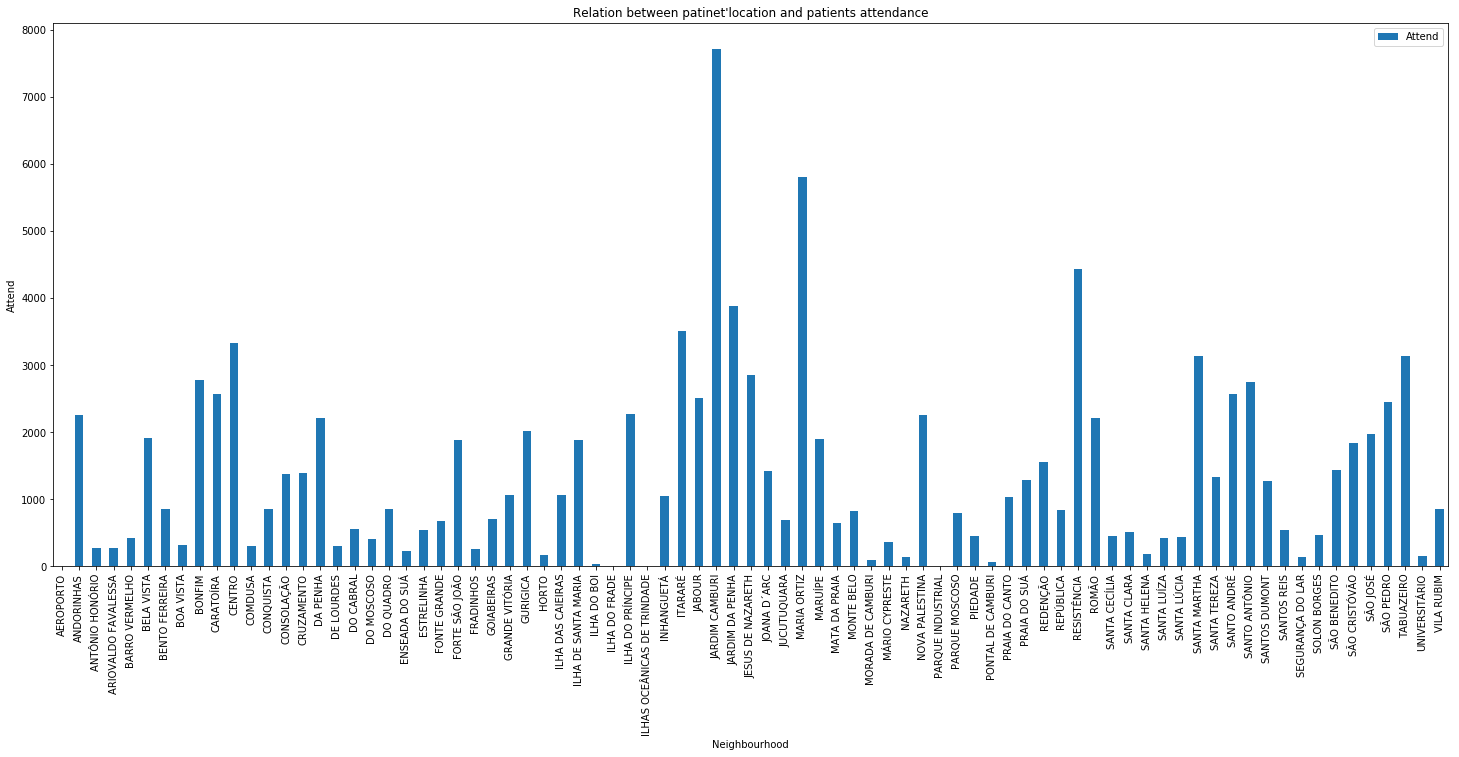

In [27]:
data[['Attend','Neighbourhood']].groupby('Neighbourhood').count().plot(kind='bar',figsize=(25,10));
plt.xlabel("Neighbourhood")
plt.ylabel("Attend")
plt.title("Relation between patinet'location and patients attendance")
plt.legend();

Jadrfim Camburi and Maria Ortiz patients have more tendency to attend their appointment unlike neighborhood such as Ilha do frade which showed the lowest attendance behavior.

<a id='conclusions'></a>
## Conclusions

In this project the impact of Age, Insurance enrollment, and patient’s location (neighborhood on patient behavior toward appointment attendance) were studied. Data analysis shows that age has low impact on patient attendance. The correlation is negative between patient age and the attendance. People who live in neighborhood such as JARDIM CAMBURI or MARIA ORTIZ have more appointment attendance than people of neighborhood such as ILHA DO BOI. Though there is no specific information about neighborhoods distance from hospitals or its stander of living for further investigation. Finally, insurance enrolment show less impact on patient attendance. Patient who have no insurance have good attending behavior.